In [1]:
import plotly.express as px
import json
import pandas as pd
import kaleido

In [2]:
df = pd.read_csv('/Users/danielfiuzadosil/Documents/GitHub_Repo/Data-Science/Real State/Idealista/idealista_search12202022_16:37.csv')

In [3]:
len(df)

700

In [4]:
df.describe()

,Unnamed: 0,propertyCode,numPhotos,price,size,rooms,bathrooms,latitude,longitude,distance,priceByArea,parkingSpace.parkingSpacePrice
count,700.000000,7.000000e+02,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,18.000000
mean,24.500000,9.721572e+07,24.967143,190821.677143,91.992857,2.550000,1.614286,43.357088,-8.407360,2637.438571,2172.807143,20115.666667
std,14.441189,6.950387e+06,11.032936,60125.825495,29.094857,1.007305,0.521165,0.011440,0.012392,1105.414447,749.130293,8311.883435
min,0.000000,2.753168e+07,0.000000,39000.000000,30.000000,0.000000,1.000000,43.333078,-8.445478,42.000000,393.000000,82.000000
25%,12.000000,9.747379e+07,17.000000,148950.000000,74.750000,2.000000,1.000000,43.348648,-8.416639,2184.250000,1643.750000,18000.000000
50%,24.500000,9.866324e+07,24.000000,189500.000000,88.000000,2.000000,2.000000,43.356724,-8.408283,2623.500000,2092.500000,20000.000000
75%,37.000000,9.932791e+07,31.000000,235000.000000,106.000000,3.000000,2.000000,43.363408,-8.398456,3249.250000,2624.250000,25000.000000
max,49.000000,9.995827e+07,87.000000,300000.000000,331.000000,8.000000,3.000000,43.384552,-8.337533,4995.000000,7500.000000,35000.000000


In [5]:
df.columns

Index(['Unnamed: 0', 'propertyCode', 'thumbnail', 'externalReference',
       'numPhotos', 'floor', 'price', 'propertyType', 'operation', 'size',
       'exterior', 'rooms', 'bathrooms', 'address', 'province', 'municipality',
       'district', 'country', 'latitude', 'longitude', 'showAddress', 'url',
       'distance', 'description', 'hasVideo', 'status', 'newDevelopment',
       'hasLift', 'priceByArea', 'hasPlan', 'has3DTour', 'has360',
       'hasStaging', 'topNewDevelopment', 'superTopHighlight',
       'detailedType.typology', 'suggestedTexts.subtitle',
       'suggestedTexts.title', 'neighborhood', 'parkingSpace.hasParkingSpace',
       'parkingSpace.isParkingSpaceIncludedInPrice',
       'detailedType.subTypology', 'parkingSpace.parkingSpacePrice', 'labels',
       'newDevelopmentFinished'],
      dtype='object')

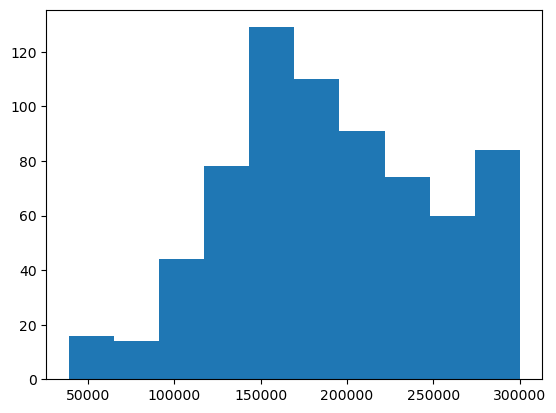

In [6]:
import matplotlib.pyplot as plt
plt.hist(df['price'])
plt.show()

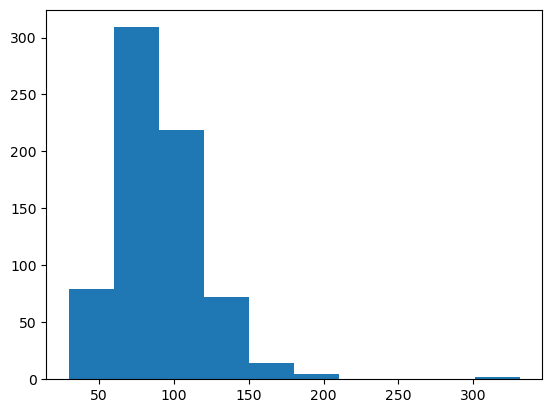

In [7]:
plt.hist(df['size'])
plt.show()

Text(0, 0.5, 'Size')

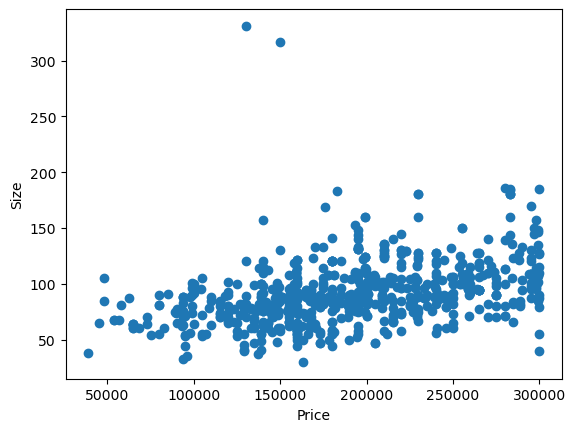

In [8]:
plt.scatter(df['price'], df['size'])
plt.xlabel('Price')
plt.ylabel('Size')

Text(0, 0.5, 'Rooms')

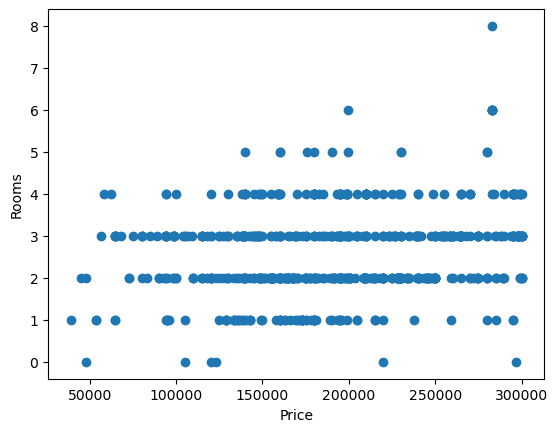

In [9]:
plt.scatter(df['price'], df['rooms'])
plt.xlabel('Price')
plt.ylabel('Rooms')

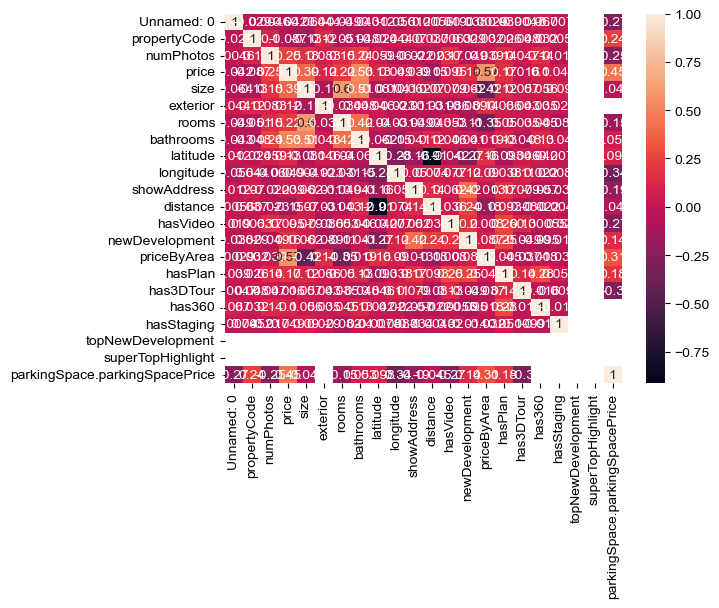

In [10]:
import seaborn as sn
sn.heatmap(df.corr(), annot=True)
sn.set(rc={'figure.figsize':(15,15)})
plt.show()


In [11]:

df.columns

Index(['Unnamed: 0', 'propertyCode', 'thumbnail', 'externalReference',
       'numPhotos', 'floor', 'price', 'propertyType', 'operation', 'size',
       'exterior', 'rooms', 'bathrooms', 'address', 'province', 'municipality',
       'district', 'country', 'latitude', 'longitude', 'showAddress', 'url',
       'distance', 'description', 'hasVideo', 'status', 'newDevelopment',
       'hasLift', 'priceByArea', 'hasPlan', 'has3DTour', 'has360',
       'hasStaging', 'topNewDevelopment', 'superTopHighlight',
       'detailedType.typology', 'suggestedTexts.subtitle',
       'suggestedTexts.title', 'neighborhood', 'parkingSpace.hasParkingSpace',
       'parkingSpace.isParkingSpaceIncludedInPrice',
       'detailedType.subTypology', 'parkingSpace.parkingSpacePrice', 'labels',
       'newDevelopmentFinished'],
      dtype='object')

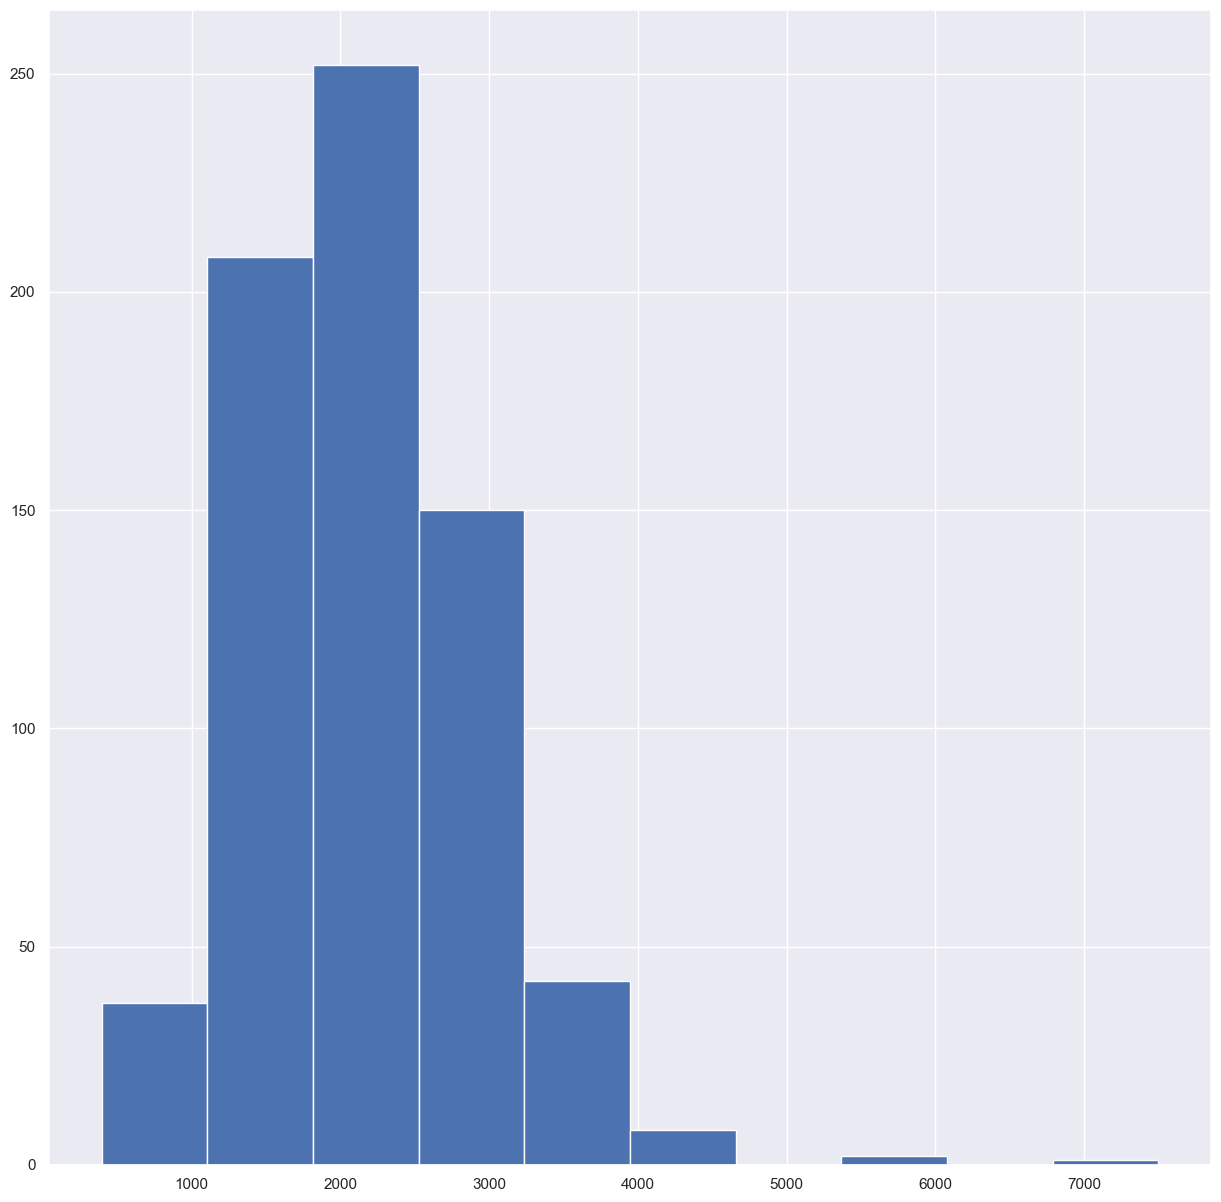

In [12]:
plt.hist(df['priceByArea'])
plt.show()

In [13]:
df_temp = df
# 
color_scale = [(0, 'blue'), (1,'red')]
fig = px.scatter_mapbox(df_temp, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="priceByArea", 
                        hover_data=["priceByArea","price","size","rooms","url"],
                        color="priceByArea",
                        color_continuous_scale=color_scale,
                        size="rooms",
                        zoom=13,
                        height=800,
                        width=800)
# fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(mapbox_style="carto-positron") 
# fig.update_layout(mapbox_style="stamen-terrain")
# fig.update_layout(mapbox_style="satellite") -> Need Mapbox API
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [14]:
df.sort_values(by='priceByArea', ascending = True)
df_temp = df[df['priceByArea'] < 1400]
# 
color_scale = [(0, 'blue'), (1,'red')]
fig = px.scatter_mapbox(df_temp, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="priceByArea", 
                        hover_data=["priceByArea","price","size","rooms","url"],
                        color="price",
                        color_continuous_scale=color_scale,
                        size="priceByArea",
                        zoom=13,
                        height=800,
                        width=800)
# fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(mapbox_style="carto-positron") 
# fig.update_layout(mapbox_style="stamen-terrain")
# fig.update_layout(mapbox_style="satellite") -> Need Mapbox API
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [23]:
df_temp = df[df['priceByArea'] < 1500]
# df_temp = df_temp[df_temp['price'] < 100000]

# 
color_scale = [(0, 'blue'), (1,'red')]
fig = px.scatter_mapbox(df_temp, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="price", 
                        hover_data=["priceByArea","price","size","rooms","url","propertyCode"],
                        color="priceByArea",
                        color_continuous_scale=color_scale,
                        size="price",
                        zoom=13,
                        height=800,
                        width=800)
# fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(mapbox_style="carto-positron") 
# fig.update_layout(mapbox_style="stamen-terrain")
# fig.update_layout(mapbox_style="satellite") -> Need Mapbox API
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [16]:
fig.write_image("price_heatmap.png") 

In [46]:
df[df['district']=='Monte Alto - Zalaeta - Atocha']['priceByArea'].mean()

2323.1363636363635

In [42]:
df[(df['priceByArea']<1300) & (df['district']!='Los Castros - Castrillón') & (df['district']!='Os Mallos')][['url', 'price', 'priceByArea', 'size','district']]

,url,price,priceByArea,size,district
5,https://www.idealista.com/inmueble/99599858/,183000.0,1000.0,183.0,Someso - Matogrande
7,https://www.idealista.com/inmueble/99133374/,170200.0,1280.0,133.0,Eirís
14,https://www.idealista.com/inmueble/99530463/,110000.0,1294.0,85.0,Eirís
15,https://www.idealista.com/inmueble/99583965/,140000.0,892.0,157.0,Someso - Matogrande
18,https://www.idealista.com/inmueble/99538521/,140000.0,1228.0,114.0,Agra del Orzán - Ventorrillo
21,https://www.idealista.com/inmueble/96989656/,130000.0,393.0,331.0,Elviña - A Zapateira
27,https://www.idealista.com/inmueble/96825468/,150000.0,1154.0,130.0,Ensanche - Juan Florez
76,https://www.idealista.com/inmueble/92164121/,199000.0,1244.0,160.0,Sagrada Familia
79,https://www.idealista.com/inmueble/35710544/,199000.0,1244.0,160.0,Sagrada Familia
87,https://www.idealista.com/inmueble/98354863/,130000.0,1083.0,120.0,Sagrada Familia


In [17]:
df_temp[df_temp['size']>100]['url']

5        https://www.idealista.com/inmueble/99599858/
7        https://www.idealista.com/inmueble/99133374/
9        https://www.idealista.com/inmueble/97111729/
15       https://www.idealista.com/inmueble/99583965/
18       https://www.idealista.com/inmueble/99538521/
                            ...                      
658    https://www.idealista.com/obra-nueva/99327910/
667      https://www.idealista.com/inmueble/83651355/
691      https://www.idealista.com/inmueble/98513574/
693      https://www.idealista.com/inmueble/99805947/
696      https://www.idealista.com/inmueble/27531680/
Name: url, Length: 128, dtype: object

In [18]:
df[(df['price']==200000) & (df['priceByArea']==1961)]['url']

200    https://www.idealista.com/inmueble/99139846/
Name: url, dtype: object

In [19]:
df[df['price']==80000]['url']

148    https://www.idealista.com/inmueble/99916192/
243    https://www.idealista.com/inmueble/99444882/
431    https://www.idealista.com/inmueble/98730461/
482    https://www.idealista.com/inmueble/99600302/
Name: url, dtype: object

In [20]:
df[df['price']==80000].iloc[0]

Unnamed: 0                                                                                   48
propertyCode                                                                           99916192
thumbnail                                     https://img3.idealista.com/blur/WEB_LISTING/0/...
externalReference                                                                        707598
numPhotos                                                                                    23
floor                                                                                         4
price                                                                                   80000.0
propertyType                                                                               flat
operation                                                                                  sale
size                                                                                       81.0
exterior                                

In [21]:
df[df['propertyCode']==99269703]['url']

Series([], Name: url, dtype: object)

In [22]:
df[df['price']<80000][['url','price','size','suggestedTexts.title']]

,url,price,size,suggestedTexts.title
0,https://www.idealista.com/inmueble/98508410/,75000.0,54.0,Piso en Calle Valencia
44,https://www.idealista.com/inmueble/92204035/,64740.0,63.0,"Piso en Calle San Luís, 40"
53,https://www.idealista.com/inmueble/96945657/,53870.0,68.0,"Piso en Camino Igrexa, 3"
64,https://www.idealista.com/inmueble/93788741/,53870.0,68.0,Piso en Camino Igrexa
65,https://www.idealista.com/inmueble/93458909/,64740.0,63.0,Piso
75,https://www.idealista.com/inmueble/96946778/,64740.0,64.0,"Piso en Calle San Luis, 40"
77,https://www.idealista.com/inmueble/87122130/,64740.0,60.0,Piso en Rúa San Luís
78,https://www.idealista.com/inmueble/93632171/,64740.0,64.0,Piso en Calle San Luís
82,https://www.idealista.com/inmueble/86357340/,64740.0,64.0,Piso en Calle San Luís
119,https://www.idealista.com/inmueble/99377127/,73000.0,64.0,Piso
